In [120]:
import numpy as np

from pathlib import Path
import jax.numpy as jnp
from jax.config import config
config.update("jax_enable_x64", True)


import matplotlib.pyplot as plt
import matplotlib.colors as colors

from caustics import mag_point_source, critical_and_caustic_curves

%config InlineBackend.figure_format='retina'

In [153]:
# Load font
fpath = Path("../docs/Mintsoda.ttf")

# Lens positions 
a = 0.72
r3 = 0. - 1.j 

# Lens mass ratios
e1 = 0.4
e2 = 0.4
e3 = 1. - e1 - e2

_, caustic_curves = critical_and_caustic_curves(npts=100, a=a, r3=r3, e1=e1, e2=e2, nlenses=3)

# Compte PS magnification
y = jnp.linspace(-1., 0.4, 600)
x = jnp.linspace(-0.7, 0.7, 600)
xgrid, ygrid = jnp.meshgrid(x,y)
wgrid = xgrid + 1j*ygrid
mag = mag_point_source(wgrid, nlenses=3, a=a, r3=r3, e1=e1, e2=e2)

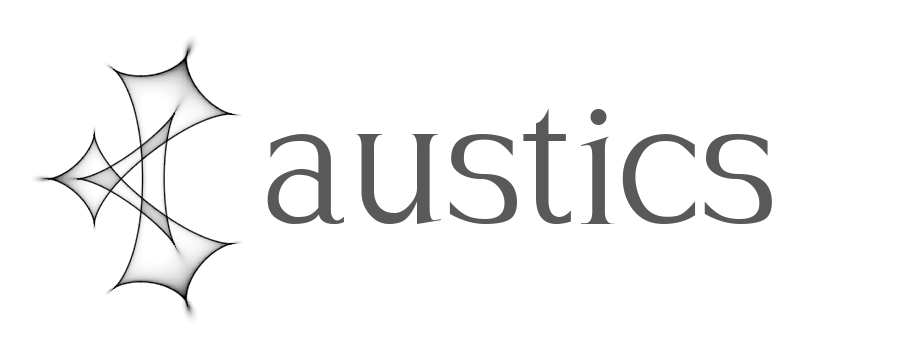

In [175]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.pcolormesh(
    # flipped axex
    wgrid.imag, wgrid.real, mag , cmap='Greys', norm=colors.LogNorm(vmin=5, vmax=30),
    zorder=-1
)

for cc in caustic_curves:
    ax.plot(cc.imag, cc.real, 'k-', lw=0.7, alpha=0.8)

ax.set_aspect(1)
ax.text(0.25, 0., "austics", fontsize=80, verticalalignment='center', font=fpath, alpha=0.65)
ax.set(xlim=(-0.8, 3.))

ax.set_rasterization_zorder(0)

# Remove frame and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

fig.savefig("../docs/logo.svg", bbox_inches='tight', dpi=300)